In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv(".\CareerMapping1.csv")

In [10]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [11]:
x = data.drop('Role', axis=1)  # Features
y = data['Role']  # Target variable


In [12]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [13]:


# Print the mapping of original labels to encoded values
for original_label, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{original_label} -> {encoded_label}")

# Optional: Print the encoded values
print("Encoded labels:", y_encoded)


AI ML Specialist -> 0
API Specialist -> 1
Application Support Engineer -> 2
Business Analyst -> 3
Customer Service Executive -> 4
Cyber Security Specialist -> 5
Database Administrator -> 6
Graphics Designer -> 7
Hardware Engineer -> 8
Helpdesk Engineer -> 9
Information Security Specialist -> 10
Networking Engineer -> 11
Project Manager -> 12
Software Developer -> 13
Software tester -> 14
Technical Writer -> 15
Encoded labels: [0 1 2 0 2]


In [6]:
y

array([ 6,  6,  6, ..., 13,  8,  9])

In [7]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.5)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.6)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

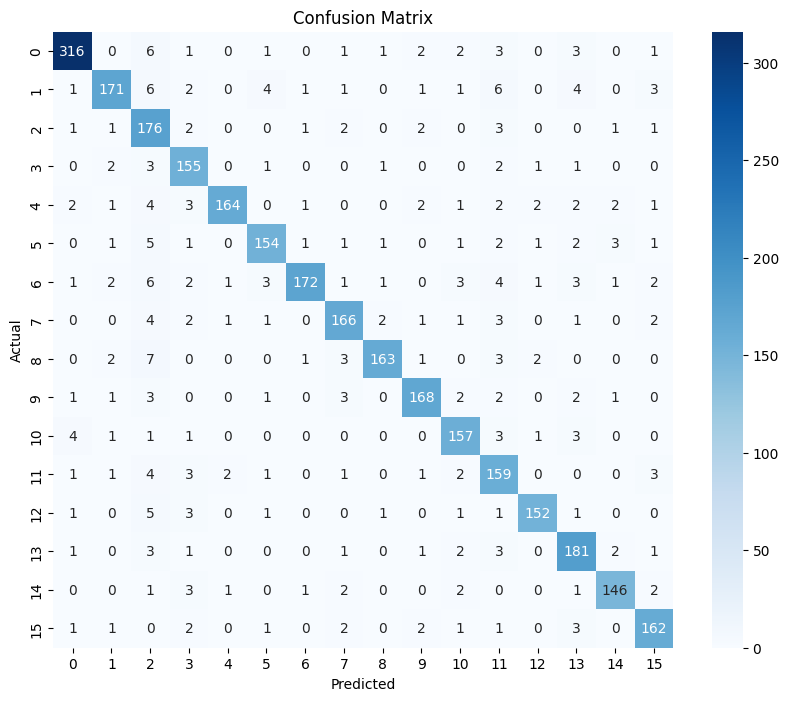

In [9]:
predictions = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9043876882776686


In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       337
           1       0.93      0.85      0.89       201
           2       0.75      0.93      0.83       190
           3       0.86      0.93      0.89       166
           4       0.97      0.88      0.92       187
           5       0.92      0.89      0.90       174
           6       0.97      0.85      0.90       203
           7       0.90      0.90      0.90       184
           8       0.96      0.90      0.93       182
           9       0.93      0.91      0.92       184
          10       0.89      0.92      0.90       171
          11       0.81      0.89      0.85       178
          12       0.95      0.92      0.93       166
          13       0.87      0.92      0.90       196
          14       0.94      0.92      0.93       159
          15       0.91      0.92      0.91       176

    accuracy                           0.90      3054
   macro avg       0.91   

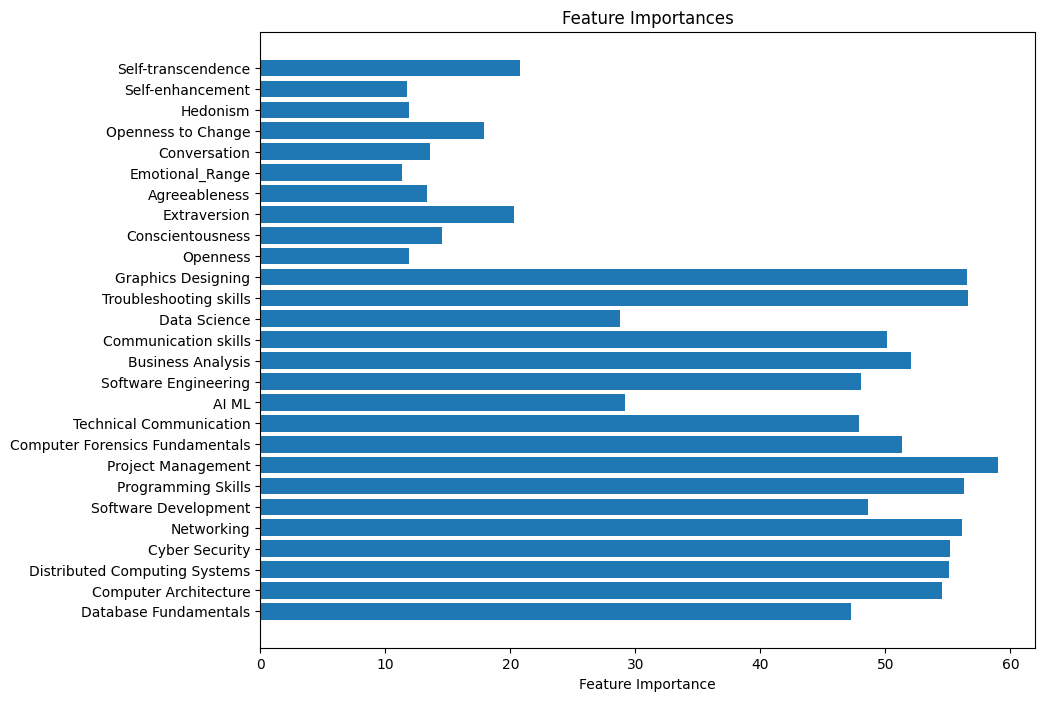

In [54]:
a=model.feature_importances_

data = a * 1000
labels = ['Database Fundamentals', 'Computer Architecture',
       'Distributed Computing Systems', 'Cyber Security', 'Networking',
       'Software Development', 'Programming Skills', 'Project Management',
       'Computer Forensics Fundamentals', 'Technical Communication', 'AI ML',
       'Software Engineering', 'Business Analysis', 'Communication skills',
       'Data Science', 'Troubleshooting skills', 'Graphics Designing',
       'Openness', 'Conscientousness', 'Extraversion', 'Agreeableness',
       'Emotional_Range', 'Conversation', 'Openness to Change', 'Hedonism',
       'Self-enhancement', 'Self-transcendence']

indices = range(len(data))

plt.figure(figsize=(10, 8))
plt.barh(indices, data, align='center')
plt.yticks(indices, labels)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


In [12]:
list=[]
estimators = [200, 225, 250, 300]  #
# depth
features = [i for i in range(10,15)]
min_samples_s = [7, 8, 9, 10] #[2, 3, 4, 5, 6]
min_samples_l = [6, 7, 8, 9] #[2, 3]
for i in estimators:
#     for j in depth:
    for k in features:
        for l in min_samples_s:
            for m in min_samples_l:
                rf2=RandomForestClassifier(n_estimators=i,
                                          max_features=k,min_samples_split=l,min_samples_leaf=m)
                rf2.fit(x_train,y_train)
                y_train_pred = rf2.predict(x_train)
                train_accuracy = accuracy_score(y_train, y_train_pred)
                y_val_pred = rf2.predict(x_val)
                val_accuracy = accuracy_score(y_val, y_val_pred)
                list.append((i, k, l, m, train_accuracy, val_accuracy))
                print(f'''For n_estimators:{i},max_features:{k},min_samples_split:{l},min_samples_leaf:{m}
                train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')


For n_estimators:200,max_features:10,min_samples_split:7,min_samples_leaf:6
                train accuracy:0.983100805659265 validation accuracy:0.9052062868369352
For n_estimators:200,max_features:10,min_samples_split:7,min_samples_leaf:7
                train accuracy:0.9777952446453134 validation accuracy:0.906188605108055
For n_estimators:200,max_features:10,min_samples_split:7,min_samples_leaf:8
                train accuracy:0.9707211632933779 validation accuracy:0.9042239685658153
For n_estimators:200,max_features:10,min_samples_split:7,min_samples_leaf:9
                train accuracy:0.9614855570839065 validation accuracy:0.9032416502946955
For n_estimators:200,max_features:10,min_samples_split:8,min_samples_leaf:6
                train accuracy:0.9864413440754569 validation accuracy:0.906679764243615
For n_estimators:200,max_features:10,min_samples_split:8,min_samples_leaf:7
                train accuracy:0.9783847514246414 validation accuracy:0.9052062868369352
For n_estimat

In [13]:
print(list)
all_test_acc=[list[i][4] for i in range(len(list))]
all_val_acc=[list[i][5] for i in range(len(list))]
print(all_test_acc)
print(all_val_acc)

[(200, 10, 7, 6, 0.983100805659265, 0.9052062868369352), (200, 10, 7, 7, 0.9777952446453134, 0.906188605108055), (200, 10, 7, 8, 0.9707211632933779, 0.9042239685658153), (200, 10, 7, 9, 0.9614855570839065, 0.9032416502946955), (200, 10, 8, 6, 0.9864413440754569, 0.906679764243615), (200, 10, 8, 7, 0.9783847514246414, 0.9052062868369352), (200, 10, 8, 8, 0.9711141678129298, 0.9047151277013753), (200, 10, 8, 9, 0.9622715661230105, 0.9022593320235757), (200, 10, 9, 6, 0.984869325997249, 0.9052062868369352), (200, 10, 9, 7, 0.9775987423855375, 0.9076620825147348), (200, 10, 9, 8, 0.969345647474946, 0.9047151277013753), (200, 10, 9, 9, 0.9634505796816664, 0.9047151277013753), (200, 10, 10, 6, 0.984672823737473, 0.9042239685658153), (200, 10, 10, 7, 0.9764197288268815, 0.9056974459724951), (200, 10, 10, 8, 0.968559638435842, 0.9047151277013753), (200, 10, 10, 9, 0.9646295932403223, 0.9052062868369352), (200, 11, 7, 6, 0.9834938101788171, 0.9052062868369352), (200, 11, 7, 7, 0.976616231086657

In [14]:
import heapq
max_5_val_acc = heapq.nlargest(10, all_val_acc)
max_5_val_acc

[0.9081532416502947,
 0.9081532416502947,
 0.9076620825147348,
 0.9076620825147348,
 0.9076620825147348,
 0.9071709233791748,
 0.9071709233791748,
 0.9071709233791748,
 0.9071709233791748,
 0.9071709233791748]

In [15]:
for i in range(len(max_5_val_acc)):
    print(list[all_val_acc.index(max_5_val_acc[i])])

(200, 14, 8, 7, 0.9766162310866575, 0.9081532416502947)
(200, 14, 8, 7, 0.9766162310866575, 0.9081532416502947)
(200, 10, 9, 7, 0.9775987423855375, 0.9076620825147348)
(200, 10, 9, 7, 0.9775987423855375, 0.9076620825147348)
(200, 10, 9, 7, 0.9775987423855375, 0.9076620825147348)
(200, 11, 8, 6, 0.9856553350363529, 0.9071709233791748)
(200, 11, 8, 6, 0.9856553350363529, 0.9071709233791748)
(200, 11, 8, 6, 0.9856553350363529, 0.9071709233791748)
(200, 11, 8, 6, 0.9856553350363529, 0.9071709233791748)
(200, 11, 8, 6, 0.9856553350363529, 0.9071709233791748)


In [16]:
rf=RandomForestClassifier(n_estimators=200,max_features=14,min_samples_split=8,min_samples_leaf=7)
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_val_pred = rf.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = rf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(val_accuracy)
print(test_accuracy)

0.9779917469050894
0.9071709233791748
0.899803536345776


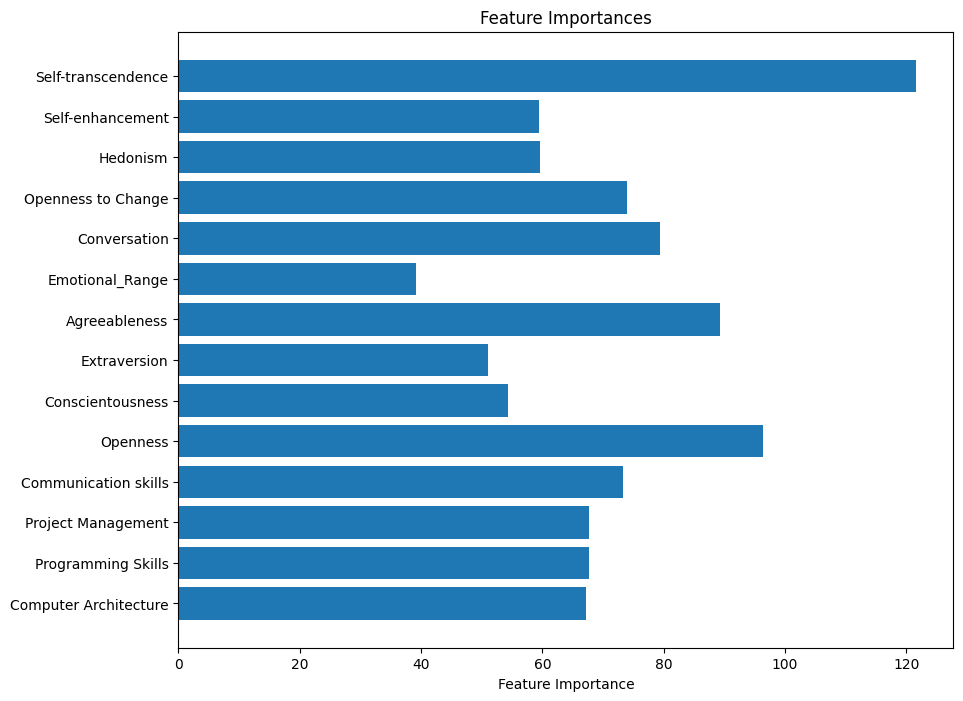

In [17]:
a=rf.feature_importances_

fi_data = a * 1000
labels = ['Computer Architecture', 'Programming Skills', 'Project Management',
       'Communication skills', 'Openness', 'Conscientousness', 'Extraversion',
       'Agreeableness', 'Emotional_Range', 'Conversation',
       'Openness to Change', 'Hedonism', 'Self-enhancement',
       'Self-transcendence']

indices = range(len(fi_data))

plt.figure(figsize=(10, 8))
plt.barh(indices, fi_data, align='center')
plt.yticks(indices, labels)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


[[97.70318021  0.          0.35335689  0.35335689  0.          0.17667845
   0.          0.70671378  0.          0.          0.          0.17667845
   0.          0.35335689  0.17667845  0.        ]
 [ 0.34129693 96.92832765  0.34129693  1.02389078  0.          0.
   0.          0.          0.          0.34129693  0.68259386  0.
   0.          0.34129693  0.          0.        ]
 [ 0.          0.         98.97610922  0.          0.          0.
   0.          0.          0.          0.          0.          0.68259386
   0.          0.34129693  0.          0.        ]
 [ 0.3030303   0.          0.60606061 98.18181818  0.          0.
   0.          0.          0.          0.          0.          0.3030303
   0.          0.3030303   0.3030303   0.        ]
 [ 0.          0.          0.31347962  0.31347962 98.43260188  0.
   0.          0.          0.          0.          0.          0.
   0.          0.62695925  0.          0.31347962]
 [ 0.          0.          0.          0.33783784  0. 

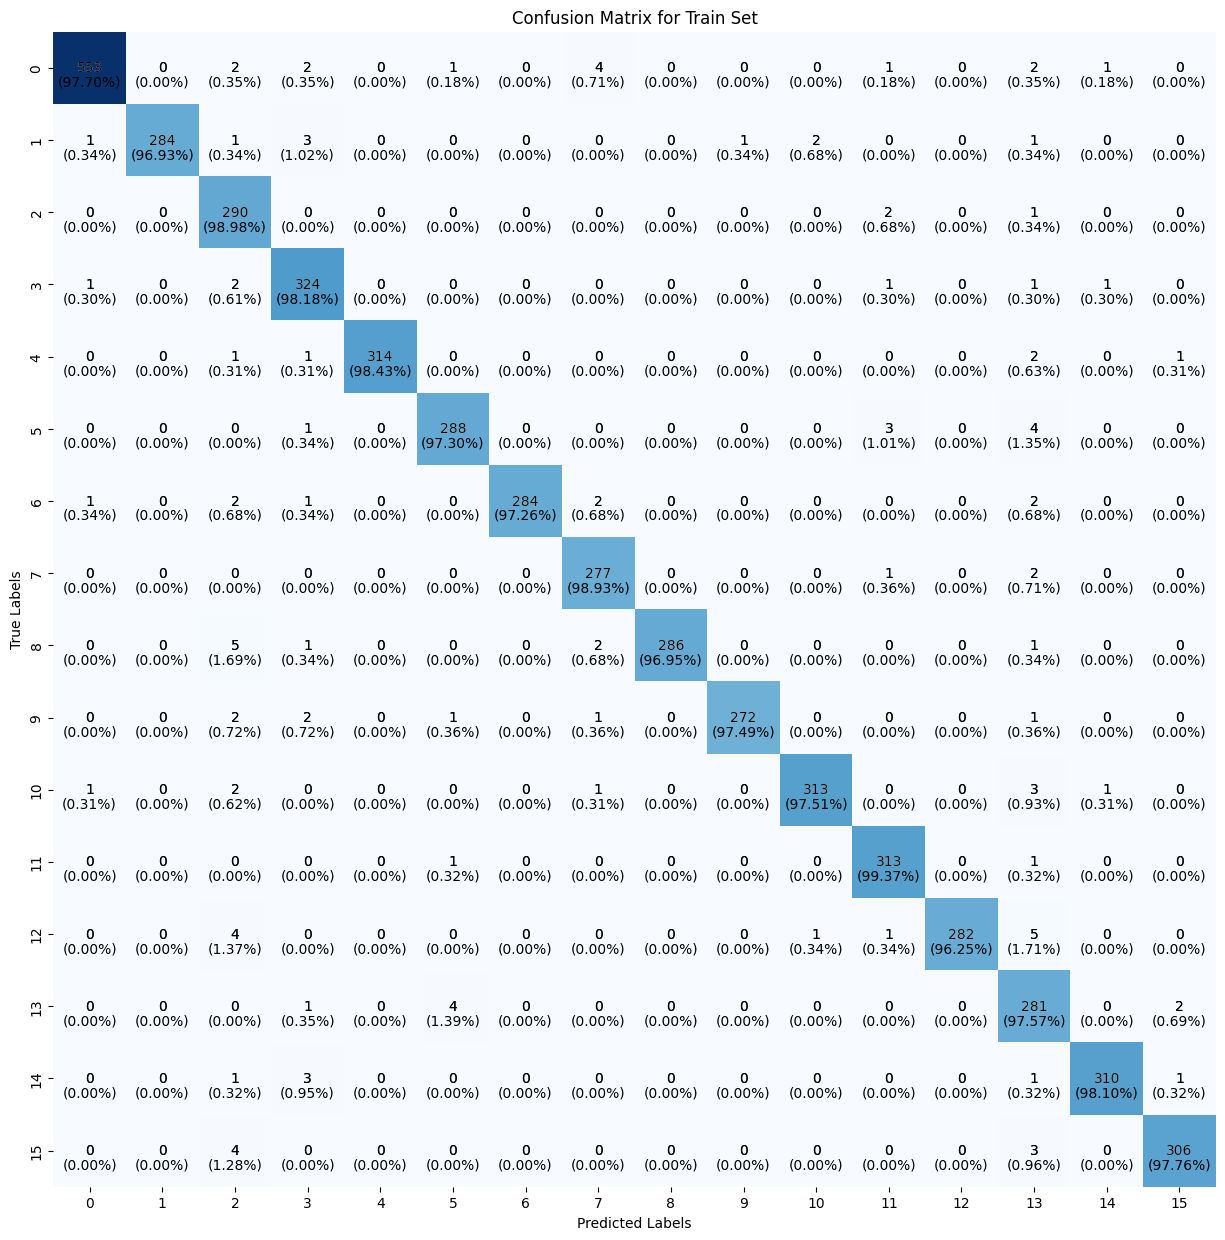

In [18]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

[[93.76854599  0.          1.78041543  1.48367953  0.29673591  0.
   0.          0.          0.          0.          0.29673591  1.48367953
   0.          0.59347181  0.29673591  0.        ]
 [ 0.49751244 84.57711443  2.98507463  2.48756219  0.49751244  0.49751244
   0.49751244  0.99502488  0.          0.49751244  1.99004975  1.49253731
   0.          1.49253731  0.49751244  0.99502488]
 [ 0.          1.05263158 92.63157895  0.52631579  0.          0.52631579
   1.05263158  1.57894737  0.          0.          0.52631579  1.05263158
   0.          0.          0.52631579  0.52631579]
 [ 0.60240964  0.          1.80722892 92.1686747   0.          0.
   0.          1.80722892  0.          0.          0.          1.80722892
   0.          1.20481928  0.          0.60240964]
 [ 0.53475936  0.53475936  0.53475936  2.13903743 87.70053476  0.
   1.06951872  1.60427807  0.          0.53475936  2.67379679  1.06951872
   0.          0.53475936  0.53475936  0.53475936]
 [ 0.          0.          1.

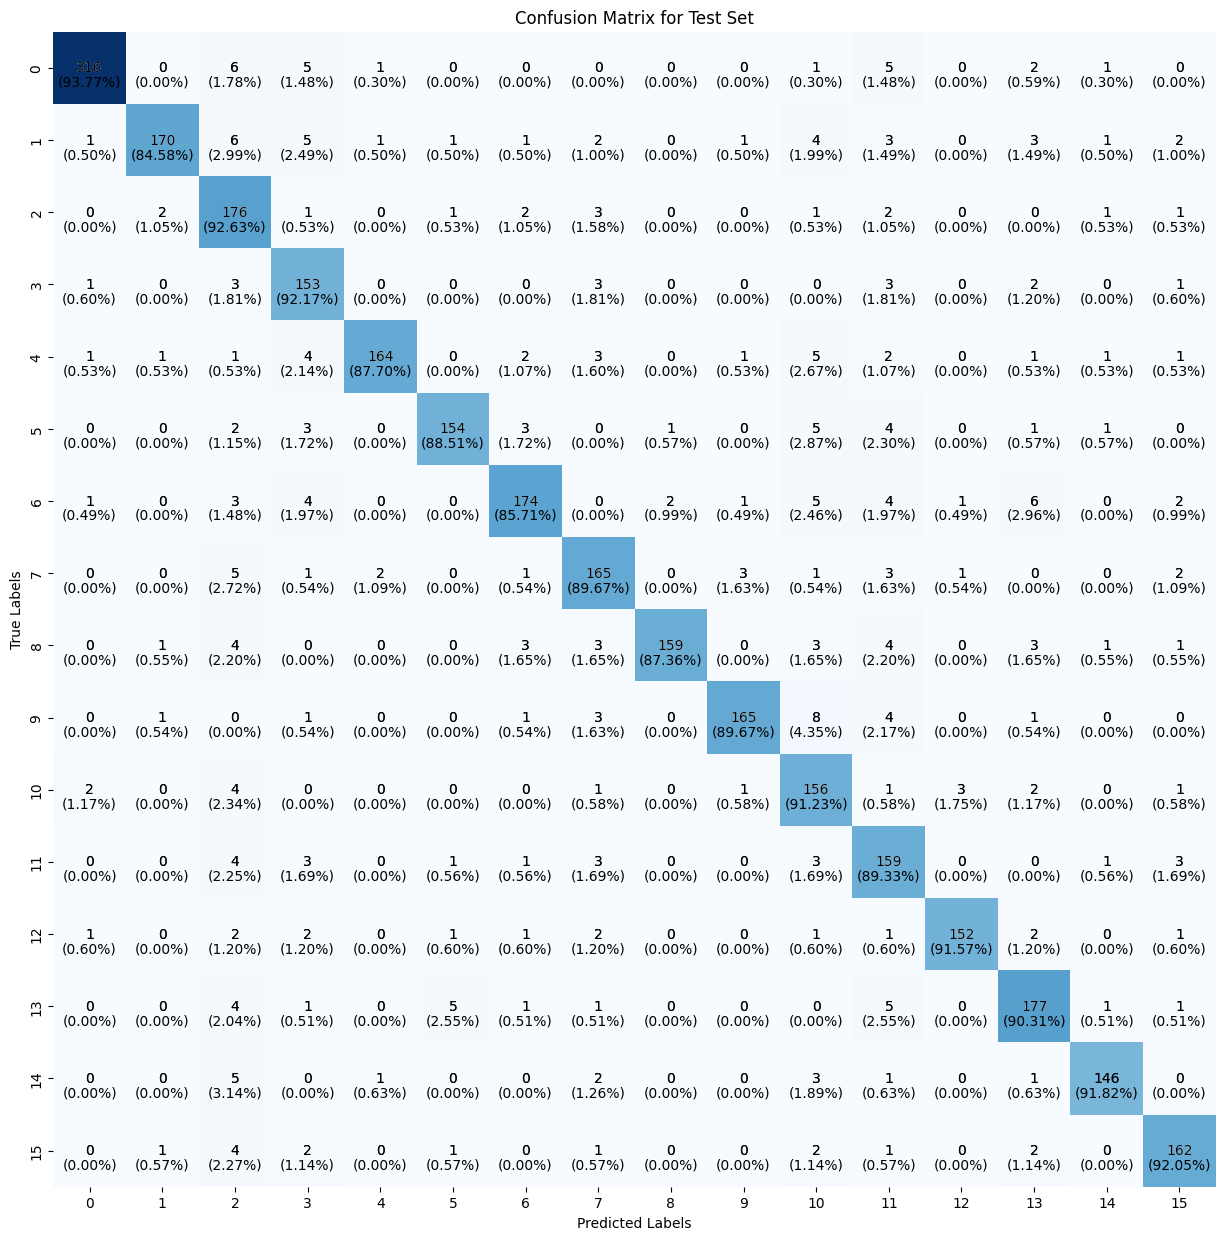

In [20]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()